<p style="text-align:center;">
<img src="https://resources.digitalfutures.com/data-science/datascience-notebook-header.png"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# Digital Futures Linear Regression Challenge

- This challenge will consist of a set of exercises related to Linear Regression
- Please use the statsmodel package instead of scikit-learn for this challenge book
- You will have 1 hour to finish, save and upload your workbook to learn.digitalfutures.com, so you should keep an eye on time and make sure you will be able to do this
- To complete the exercises, please download the additional files into the same directory as your workbook

## 1.) Package and data frame imports

#### 1.1 Import your usual packages for data manipulation, visualisation, regression modeling (remember to use statsmodels!) and model evaluation here.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools

%matplotlib inline

#### 1.2 Import the USA_housing.csv file as a data frame and check the first few rows.

In [2]:
#Creating a USA_housing dataframe (housing) from the USA_housing.csv file
housing = pd.read_csv("USA_housing.csv")

In [3]:
#Removing any limitations to the maximum number of columns that can be displayed
pd.set_option('display.max_columns', None)

In [4]:
#Checking the first five rows
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## 2.) EDA

#### 2.1 Check the data for null values.

In [5]:
# Counting the nulls in the data

nulls = housing.isnull()
nulls.sum()

Avg. Area Income             0
Avg. Area House Age          0
Avg. Area Number of Rooms    0
Area Population              0
Price                        0
Address                      0
dtype: int64

In [6]:
#There are no nulls in the data, so there is no need for further investigation of null values (i.e., creating a function that determines the percentage of null values, etc.)

#### 2.2 Check summary stastics of numerical feature variables.

In [7]:
# .describe() gives us a summary statistics of only the numerical variables
# #.describe(include = "all") would give us the summary statistics for all data types
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,69621.713378,2.469066e+06


#### 2.3 Visualise the relationship between all numerical features using a pairplot.

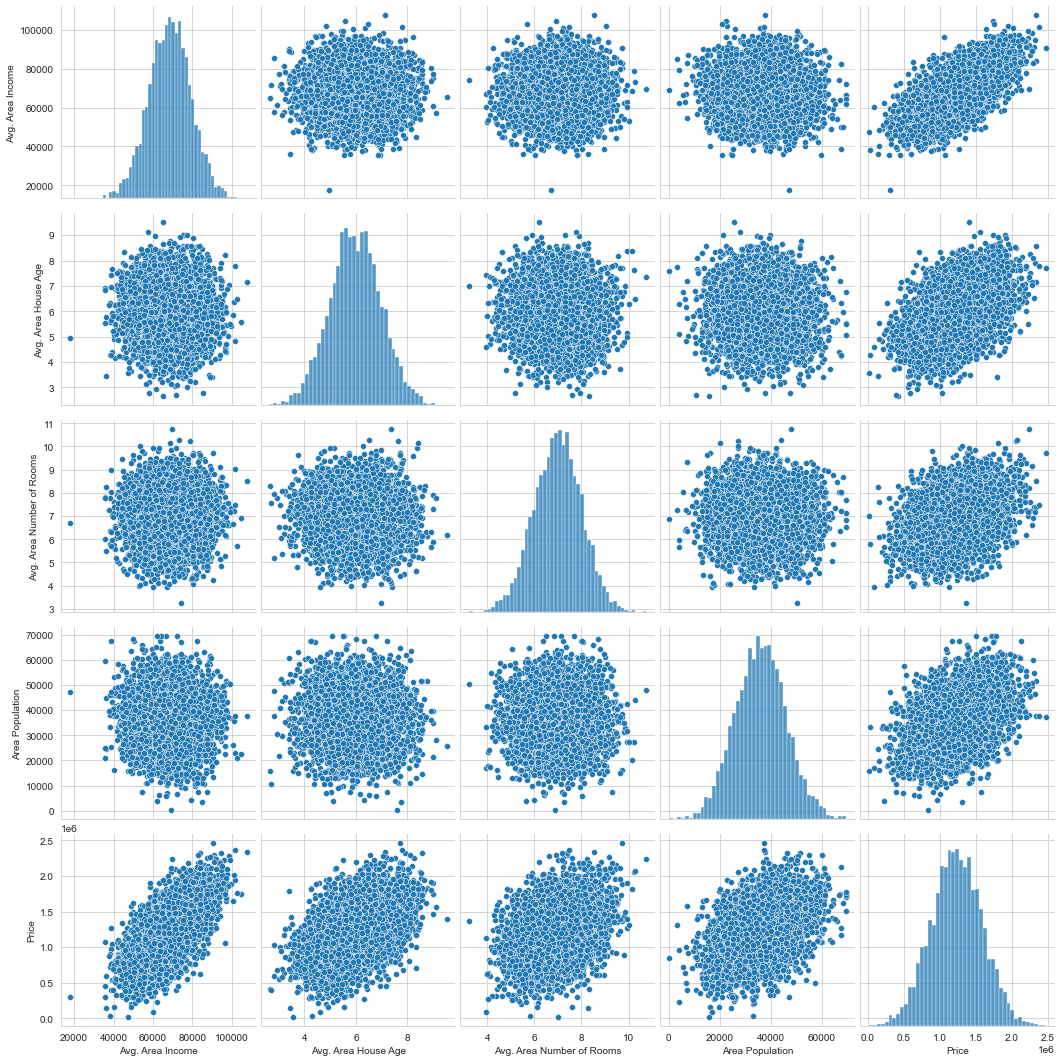

In [8]:
#Using the pairplot function from the seaborn package
sns.pairplot(housing, height=3)
plt.show()

#### 2.4 Create a heatmap of the correalations between features.

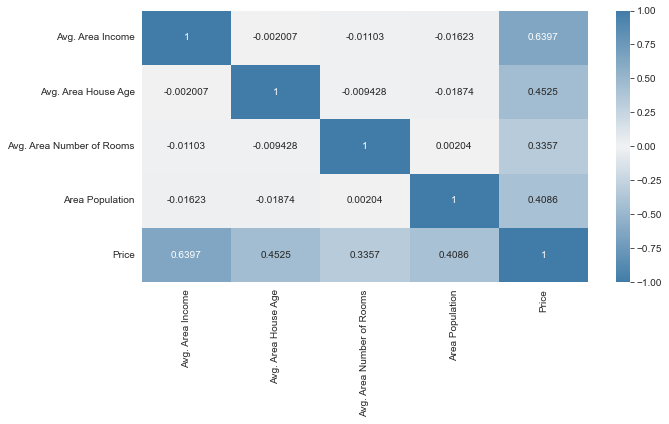

In [9]:
##Using the heatmap function from the seaborn package
plt.figure(figsize = (10, 5)) #adjusting figure size
sns.heatmap(housing.corr(),
            annot = True,
            linecolor='black',
            center=0,
            vmin=-1,
            vmax=1,
            cmap = sns.diverging_palette(600,600, as_cmap=True),
            fmt='.4g'
            )
plt.show()

#### 2.5 Create a frequency distributions plot for the Price and Income columns.

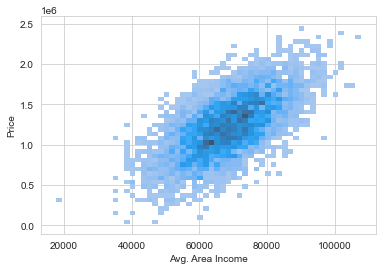

In [10]:
#Using the histplot function from the seaborn package to view frequency distributions for the Price and Income columns
sns.histplot(data=housing, x="Avg. Area Income", y="Price")
plt.show()

## 3.) Modeling

#### 3.1 Your task is to fit a model to Price. First, create a  train-test-split with the test-size being 20% and random state being 42.

In [11]:
# Creating base feature_cols for X.

feature_cols = list(housing.columns)
feature_cols.remove('Price')

In [12]:
# Creating X, and y that will be used in the train_test_split function

X = housing[feature_cols]
y = housing['Price']

In [13]:
#Creating a train-test-split with a test-size of 20% and a random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
#Checking that X_train and y_train have the same rows
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Address
4227,66547.016454,5.846095,6.847298,27850.822901,"2288 Gary Square Apt. 812\nWest Jose, PR 78536..."
4676,53722.008599,6.401391,7.787764,47649.224665,USS Williams\nFPO AE 65283
800,64838.492899,6.437157,8.699544,32921.010068,Unit 2193 Box 7909\nDPO AA 47323-2101
3671,67097.092120,6.086754,7.211963,27191.506877,"052 Thomas Square Apt. 034\nWrightmouth, OR 04272"
4193,75245.465436,8.167820,7.420100,37410.669928,"879 Martha Route Suite 031\nNew Nichole, VI 60708"


In [15]:
#Checking that X_train and y_train have the same rows - they do
y_train.head()

4227    1.094880e+06
4676    1.300389e+06
800     1.382172e+06
3671    1.027428e+06
4193    1.562887e+06
Name: Price, dtype: float64

#### 3.2 Create and fit the linear regression model (again, remember to use statsmodel!).

In [16]:
##adding the constant to X_train
X_train = sm.add_constant(X_train)

In [17]:
#checking X_train data types
X_train.dtypes
#instead of dropping the redundant Address column, I simply did not include it in the columns that are considered in linear regression.
#I could have dropped the column with housing.drop(columns=['Address'], inplace=True)

const                        float64
Avg. Area Income             float64
Avg. Area House Age          float64
Avg. Area Number of Rooms    float64
Area Population              float64
Address                       object
dtype: object

In [18]:
#creating the linear regression model
lin_reg = sm.OLS(y_train, X_train[["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms", "Area Population", "const"]])

In [19]:
#showing that the linear regression model has been created
lin_reg

#### 3.2 Create a model summary.

In [20]:
#printing the model summary
results = lin_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.117e+04
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:22:50   Log-Likelihood:                -51779.
No. Observations:                4000   AIC:                         1.036e+05
Df Residuals:                    3995   BIC:                         1.036e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Avg. Area Income      

## 4.) Predictions

#### 4.1 Create a variable holding your y_test predictions.

In [21]:
#Creating a column in X_train that contains y_test predictions
X_train['y_pred'] = results.predict(X_train[["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms", "Area Population", "const"]])

In [22]:
#assigning the y_test prediction column to y_test_prediction
y_test_prediction = X_train["y_pred"]
#Checking the first few rows
y_test_prediction.head()

4227    1.022420e+06
4676    1.252124e+06
800     1.384291e+06
3671    1.108032e+06
4193    1.808466e+06
Name: y_pred, dtype: float64

#### 4.2 Return the evaluation metrics: RMSE, MAE, MSE.

In [23]:
#Printing the RMSE evaluation metric
rmse = statsmodels.tools.eval_measures.rmse(y_train, X_train['y_pred'])

print(f'the RMSE is {rmse}')

the RMSE is 101308.07616278151


In [24]:
#Printing the MAE evaluation metric
mae = statsmodels.tools.eval_measures.meanabs(y_train, X_train['y_pred'])

print(f'the MAE is {mae}')

the MAE is 81489.37808063524


In [25]:
#Printing the MSE evaluation metric
mse = statsmodels.tools.eval_measures.mse(y_train, X_train['y_pred'])

print(f'the MSE is {mse}')

the MSE is 10263326295.803938
